# Artficial Intelligence Internship @CodeClause
# Author - Ajinkya Chavan
# Language & IDE - Python/Jupyter Notebook
# Project - II
# Animal Species Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        continue
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

path_root = '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/'

In [2]:
!nvidia-smi

Mon Aug 22 14:23:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
for i, animal in enumerate(os.listdir(path_root)):
    print(f'{animal:15s}', len(os.listdir(path_root + '/' + animal)), end='\t\t')
    
    if (i+1) % 5 == 0:
        print(' ')

beetle          60		parrot          60		fox             60		wolf            60		hedgehog        60		 
turtle          60		snake           60		shark           60		horse           60		antelope        60		 
hamster         60		woodpecker      60		eagle           60		chimpanzee      60		bison           60		 
penguin         60		butterfly       60		sandpiper       60		hornbill        60		lion            60		 
lobster         60		oyster          60		otter           60		grasshopper     60		raccoon         60		 
dog             60		pigeon          60		donkey          60		hippopotamus    60		hummingbird     60		 
bear            60		coyote          60		bee             60		pig             60		rat             60		 
owl             60		caterpillar     60		koala           60		squid           60		hare            60		 
whale           60		mouse           60		tiger           60		fly             60		lizard          60		 
orangutan       60		bat             60		porcupine       60		kangaroo        60		go

In [4]:
for i, animal in enumerate(os.listdir(path_root)):
    print(f'[{i+1:2d}] {animal:15s}', end='\t')
    
    if (i+1) % 5 == 0:
        print(' ')

[ 1] beetle         	[ 2] parrot         	[ 3] fox            	[ 4] wolf           	[ 5] hedgehog       	 
[ 6] turtle         	[ 7] snake          	[ 8] shark          	[ 9] horse          	[10] antelope       	 
[11] hamster        	[12] woodpecker     	[13] eagle          	[14] chimpanzee     	[15] bison          	 
[16] penguin        	[17] butterfly      	[18] sandpiper      	[19] hornbill       	[20] lion           	 
[21] lobster        	[22] oyster         	[23] otter          	[24] grasshopper    	[25] raccoon        	 
[26] dog            	[27] pigeon         	[28] donkey         	[29] hippopotamus   	[30] hummingbird    	 
[31] bear           	[32] coyote         	[33] bee            	[34] pig            	[35] rat            	 
[36] owl            	[37] caterpillar    	[38] koala          	[39] squid          	[40] hare           	 
[41] whale          	[42] mouse          	[43] tiger          	[44] fly            	[45] lizard         	 
[46] orangutan      	[47] bat        

In [5]:
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from random import randint
import torch

def loadImg(pathImg):
    img = imread(pathImg)
    
    if img.max() > 1.1:
        img = img / 255.0
    
    return img

def imshow(img, size=None):
    def plotar(imagem, cmap=None):
        if size is None:
            plt.imshow(imagem)
            plt.show()
            return
        
        plt.figure(figsize=size)
        plt.imshow(imagem, cmap=cmap)
        plt.show()
        
    if img.max() > 1.0:
        img = img / 255.0

    if type(img) == np.ndarray:
        if len(img.shape) == 3:
            plotar(img)
        else:
            plotar(img, cmap='gray')
    else:
        with torch.no_grad():
            img = img.clone()
            img = img.to("cpu")

            if img.min() < 0.0: # "des"normalizar
                img = img / 2 + 0.5 # img * std + med,

            npimg = img.detach().numpy()
            if len(npimg.shape) == 3:
                plotar(np.transpose(npimg, (1, 2, 0)))
            else:
                plotar(npimg, cmap='gray')

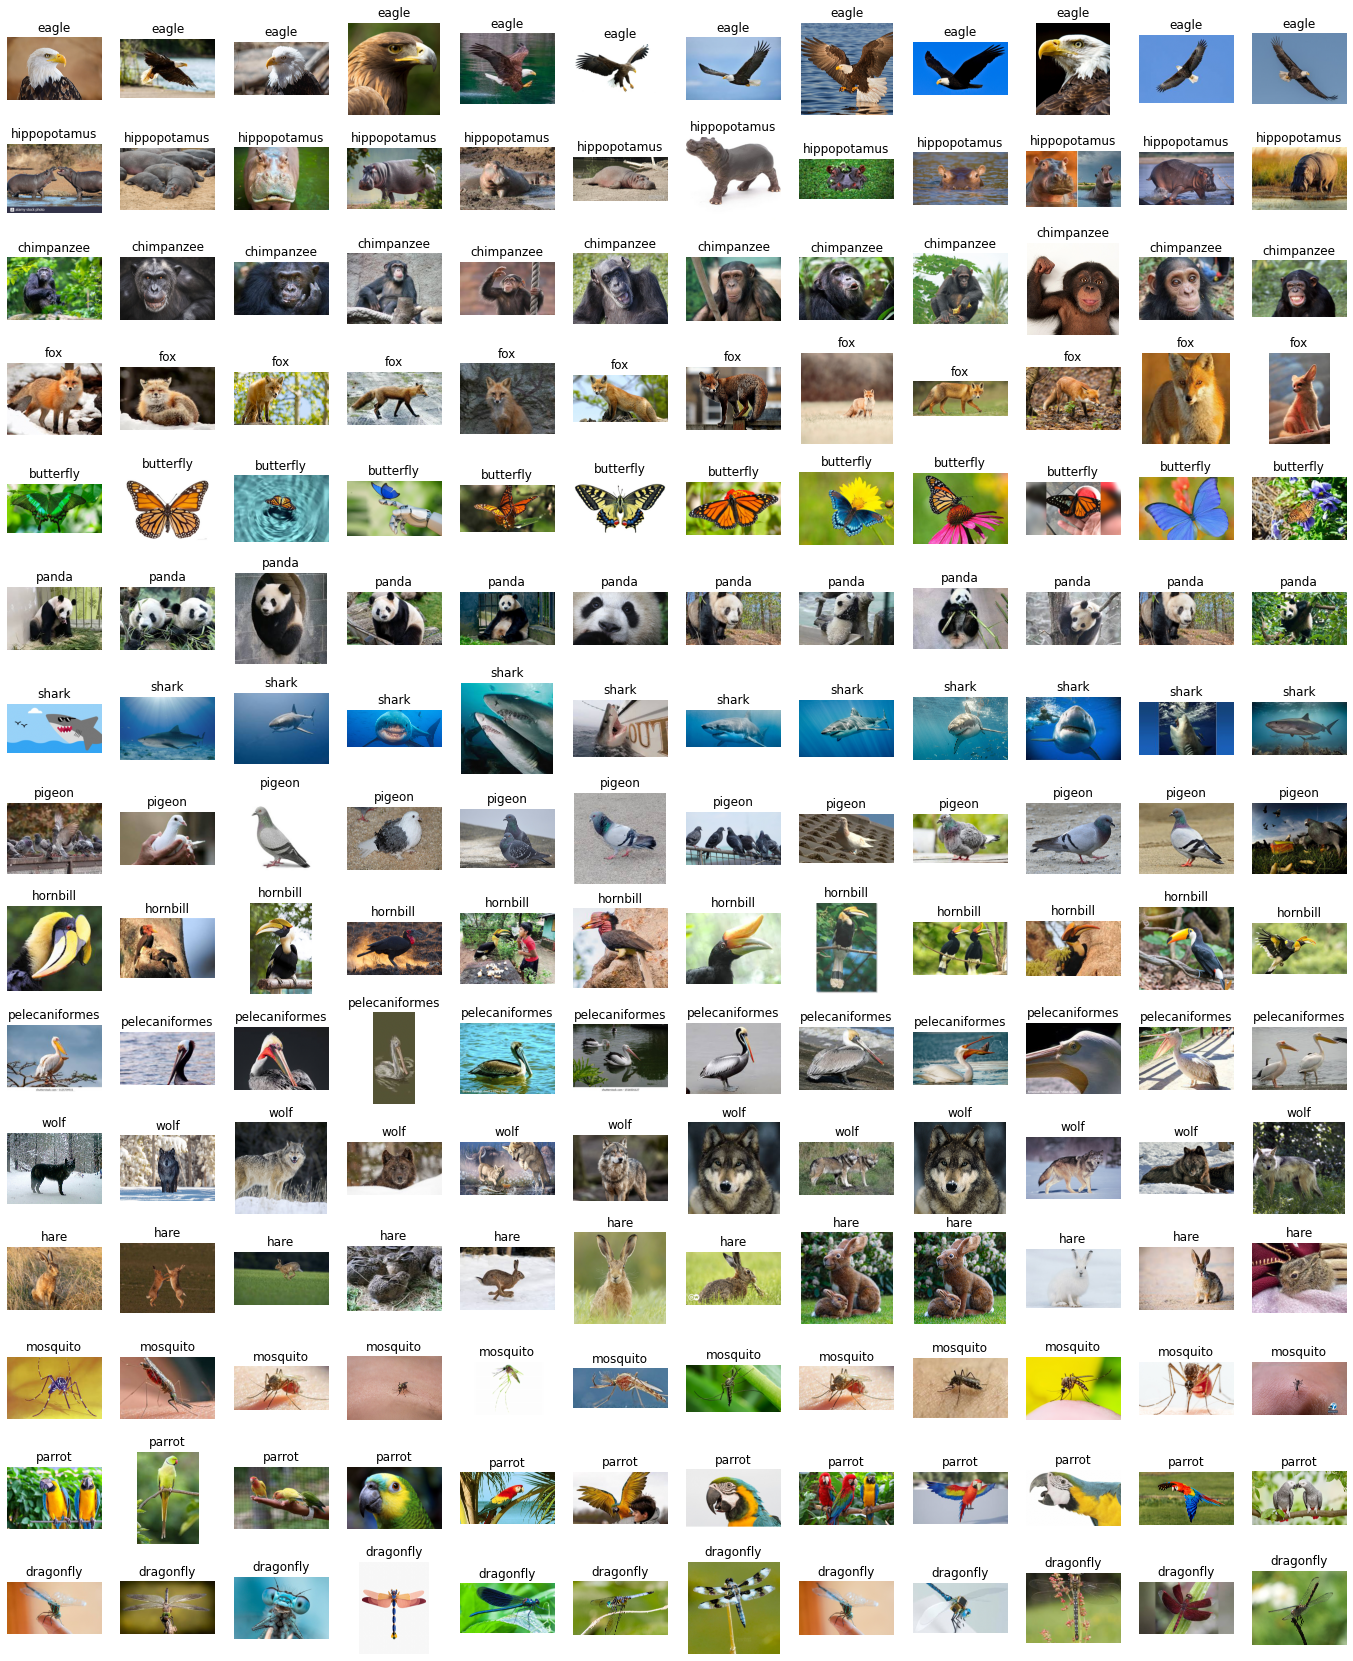

In [6]:
import random

linhas = 15 #altura
colunas = 12 #largura

imgs = random.sample(os.listdir(path_root), k = linhas)

fig, axs = plt.subplots(linhas, colunas, figsize=(colunas * 2, linhas * 2)) #colunas = x, linhas = y

for lin, label in enumerate(imgs):
    lista = os.listdir(os.path.join(path_root, label))
    lista = random.sample(lista, k = colunas)
    
    for col, imgname in enumerate(lista):
        img = loadImg(os.path.join(path_root, label, imgname))
 
        ax = axs[lin, col]
        
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
        
plt.show()

In [7]:
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import torch

#quando for utilizado no treinamento
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transformView = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)),
])

In [8]:
labels = sorted(os.listdir(path_root))
labels[0]

'antelope'

separar em treinamento e teste

In [9]:
data_train = {}
data_test = {}

In [10]:
for label in labels:
    lista = os.listdir(os.path.join(path_root, label))

    teste = random.sample(list(range(len(lista))), k = 10) # 10 imagens de teste e 50 imagens de treinamento
    teste = sorted(teste, reverse=True)
    
    data_train[label] = []
    data_test[label] = []

    while teste:
        data_test[label].append(lista.pop(teste.pop(0)))

    for imgname in lista:
        data_train[label].append(imgname)

In [11]:
print(data_train.keys())

dict_keys(['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra'])


In [12]:
print(len(data_train['antelope']))
print(len(data_test['antelope']))

50
10


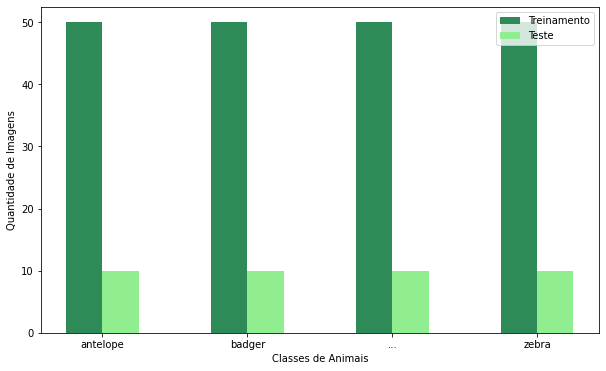

In [13]:
g_labels = list(data_train.keys())[:2]
g_labels.append('...')
g_labels.append(list(data_train.keys())[-1])

n_train = [len(data_train[gl]) if gl != '...' else len(data_train['whale']) for gl in g_labels]
n_test = [len(data_test[gl]) if gl != '...' else len(data_test['whale']) for gl in g_labels]

bar_width = 0.25

plt.figure(figsize=(10, 6))

r1 = list(range(len(g_labels)))
r2 = [x + bar_width for x in r1]

plt.bar(r1, n_train, color='#2E8B57', width=bar_width, label='Treinamento')
plt.bar(r2, n_test, color='#90EE90', width=bar_width, label='Teste')

plt.xticks([x + bar_width / 2 for x in r1], g_labels)
plt.xlabel('Classes de Animais')
plt.ylabel('Quantidade de Imagens')

plt.legend()
plt.show()

leopard


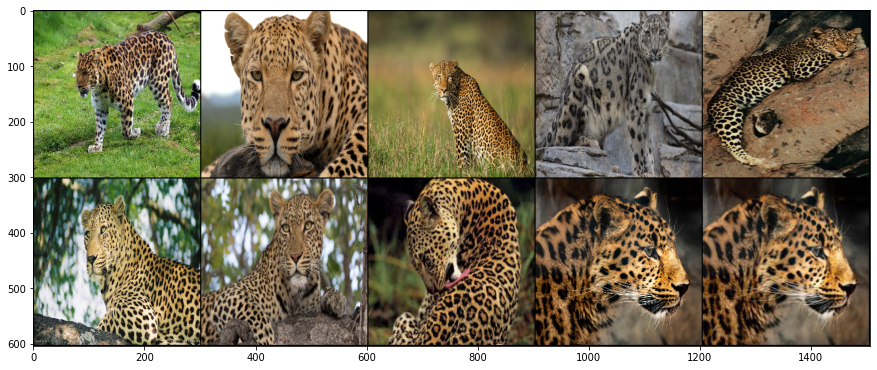

In [14]:
animal = random.choice(labels)
print(animal)

imshow(
    make_grid(
        [ transformView(loadImg(os.path.join(path_root, animal, data_test[animal][i]))) for i in range(len(data_test[animal])) ],
        len(data_test[animal]) // 2
    ), (15, 15)
)

In [15]:
def mapIndexToLabel(idx):
    global labels
    
    if type(idx) != int:
        if idx.size():
            _, idx = torch.max(idx, 0)
        
        idx = idx.item()    
    
    return labels[idx]

In [16]:
mapIndexToLabel(6)

'bison'

In [17]:
import torch.nn.functional as F
import torch.nn as nn
import torch

class DatasetAnimais:
    def __init__(self, dicionario):
        global transform, labels, path_root
        
        self.transform = transform
        self.labels = labels
        self.path_root = path_root
        self.data = []

        for label in dicionario:
            for imgname in dicionario[label]:
                self.data.append((label, imgname))
                
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        data = self.data[idx]
        
        img = loadImg(os.path.join(self.path_root, *data))
        img = self.transform(img)
        
        label = self.labels.index(data[0])
        label = F.one_hot(torch.tensor(label), num_classes=len(self.labels))
        
        return img, label

In [18]:
datatrain = DatasetAnimais(data_train)
datatest = DatasetAnimais(data_test)

print(len(datatrain))
print(len(datatest))

4500
900


In [19]:
lr = 5e-4
batch_size = 32

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [20]:
train_loader = torch.utils.data.DataLoader(datatrain, batch_size = batch_size, shuffle = True, num_workers = 2, drop_last = False)
test_loader = torch.utils.data.DataLoader(datatest, batch_size = batch_size, shuffle = False, num_workers = 2, drop_last = False)

Treinamento



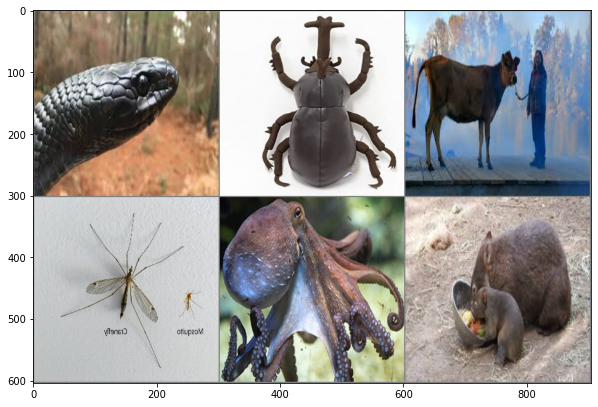

['snake', 'beetle', 'cow', 'mosquito', 'octopus', 'wombat']


Teste



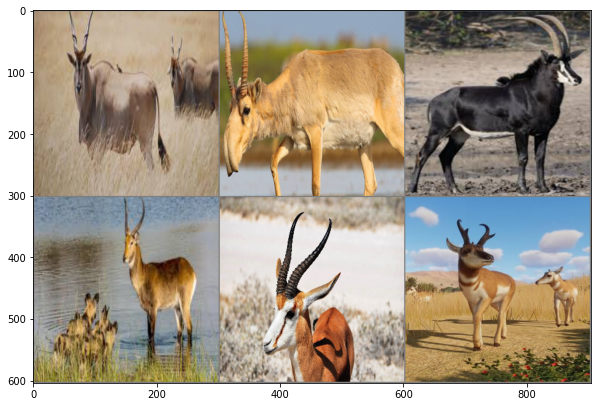

['antelope', 'antelope', 'antelope', 'antelope', 'antelope', 'antelope']


In [21]:
print("Treinamento\n")

img, label = next(iter(train_loader))

imshow(make_grid(img[:6], 3), (10, 10))
print([ mapIndexToLabel(label[i]) for i in range(6) ])

print("\n\nTeste\n")

img, label = next(iter(test_loader))

imshow(make_grid(img[:6], 3), (10, 10))
print([ mapIndexToLabel(label[i]) for i in range(6) ])

In [22]:
mapIndexToLabel(torch.tensor([1, 0, 0, 0, 0, 0, 0, 0, 0]))

'antelope'

Rede feita do zero

In [23]:
# import torch.nn.functional as F
# import torch.nn as nn
# import math

# class Model(nn.Module):
#     def __init__(self):
#         super().__init__()

#         global labels

#         self.camadas = nn.Sequential(
#             #bloco0
#             nn.Conv2d(3, 512, 1, 1, 0),
#             nn.BatchNorm2d(512),
#             nn.ReLU(True),
#             #bloco1
#             nn.Conv2d(512, 512, 5, 2, 0),
#             nn.BatchNorm2d(512),
#             nn.ReLU(True),
#             nn.Conv2d(512, 256, 3, 1, 1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.MaxPool2d(3, stride=2, padding=1), #74x74
#             #bloco2
#             nn.Conv2d(256, 256, 3, 1, 1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.Conv2d(256, 256, 3, 1, 1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.MaxPool2d(3, stride=2, padding=0), #36x36
#             #bloco3
#             nn.Conv2d(256, 256, 3, 1, 1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(True),
#             nn.Conv2d(256, 128, 3, 1, 1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(True),
#             nn.MaxPool2d(3, stride=2, padding=1), #18x18
#             #bloco4
#             nn.Conv2d(128, 64, 3, 1, 1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(True),
#             nn.Conv2d(64, 64, 3, 1, 1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(True),
#             nn.MaxPool2d(3, stride=2, padding=1), #9x9
#         )
        
#         self.avgpool = nn.AvgPool2d(3, stride=2,  padding=0)
        
#         #nn.BatchNorm2d(128),
#         #nn.MaxPool2d(2)

#         self.linear1 = nn.Linear(64 * 4 * 4, 512)
#         self.linear2 = nn.Linear(512, len(labels))

#         self.ReLU = nn.ReLU()
#         self.Softmax = nn.Softmax(dim=1)

#         if torch.cuda.is_available():
#             self.cuda()

#     def forward(self, img):
#         out = self.camadas(img)
#         out = self.avgpool(out)
        
#         out = torch.flatten(out, 1)

#         out = self.ReLU(self.linear1(out))
#         out = self.Softmax(self.linear2(out))

#         return out

Inception V3

In [24]:
# from torchvision import models
# import torch.nn.functional as F
# import torch.nn as nn
# import torch

# model = models.inception_v3(pretrained=True)
# model.aux_logits = False

# #não treinar toda a rede novamente
# for parameter in model.parameters():
#     parameter.requires_grad = False

# #mudar a camada final da rede
# model.fc = nn.Sequential(
#     nn.Linear(model.fc.in_features, 1024),
#     nn.ReLU(True),
#     nn.Linear(1024, len(labels)),
#     nn.Softmax(1)
# )

# model = model.to(device)

MobileNetV3

In [25]:
from torchvision import models
import torch.nn.functional as F
import torch.nn as nn
import torch

model = models.mobilenet_v3_large(pretrained=True)
model.aux_logits = False

#não treinar toda a rede novamente
for parameter in model.parameters():
    parameter.requires_grad = False
    
model.classifier[-1] = nn.Sequential(
    nn.Linear(1280, len(labels))
)

model = model.to(device)

Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth


  0%|          | 0.00/21.1M [00:00<?, ?B/s]

In [26]:
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr)
criterion = nn.CrossEntropyLoss()

In [27]:
def preparar_dados(data):
    global device

    return data[0].float().to(device), data[1].float().to(device)

In [28]:
def teste(train=True):
    global test_loader, model
    model.eval()
    
    correct = 0
    total = 0

    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            inputs, labels = preparar_dados(data)

            outputs = model(inputs)
            
            _, pred = torch.max(outputs, 1)
            _, real = torch.max(labels, 1)
            
            total += labels.size(0)
            correct += (pred == real).sum().item()
    
    acerto = 100 * correct // total
    print(f'Accuracy of the network on the test images: {acerto} %')
    
    if train:
        model.train()
    
    return acerto

In [29]:
if not os.path.isdir('/kaggle/temp'):
    os.makedirs('/kaggle/temp')
    
def save():
    global model
    
    if os.path.isfile("/kaggle/temp/checkpoint.pt"):
        os.remove("/kaggle/temp/checkpoint.pt")
    
    torch.save(model.state_dict(), "/kaggle/temp/checkpoint.pt")

In [30]:
epocas = 30
print_freq = 10

ref = 0
for epoch in range(epocas):  # loop over the dataset multiple times
    ac = teste()
    
    if ac > ref:
        save()
        ref = ac
 
    print(f'epoca {epoch+1:2d} [ ', end='')

    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):

        inputs, label = preparar_dados(data)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, label)
        loss.backward()
        
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % print_freq == 0:
            print('=', end='')

    print(f' ] loss: {running_loss / i:.3f}')

ac = teste()

if ac > ref:
    save()
    ref = ac

print('\nFinished Training\n')

Accuracy of the network on the test images: 1 %
epoca  1 [ =============== ] loss: 3.115
Accuracy of the network on the test images: 79 %
epoca  2 [ =============== ] loss: 1.406
Accuracy of the network on the test images: 84 %
epoca  3 [ =============== ] loss: 0.870
Accuracy of the network on the test images: 85 %
epoca  4 [ =============== ] loss: 0.635
Accuracy of the network on the test images: 86 %
epoca  5 [ =============== ] loss: 0.490
Accuracy of the network on the test images: 87 %
epoca  6 [ =============== ] loss: 0.399
Accuracy of the network on the test images: 87 %
epoca  7 [ =============== ] loss: 0.326
Accuracy of the network on the test images: 87 %
epoca  8 [ =============== ] loss: 0.279
Accuracy of the network on the test images: 87 %
epoca  9 [ =============== ] loss: 0.233
Accuracy of the network on the test images: 88 %
epoca 10 [ =============== ] loss: 0.207
Accuracy of the network on the test images: 88 %
epoca 11 [ =============== ] loss: 0.178
Accuracy of

In [31]:
if os.path.isfile('/kaggle/temp/checkpoint.pt'):
    state_dict = torch.load('/kaggle/temp/checkpoint.pt', map_location=torch.device(device))
    model.load_state_dict(state_dict) 
    print('modelo carregado')
    teste(train=False)

modelo carregado
Accuracy of the network on the test images: 90 %


In [32]:
model.eval()

p_c = {}

with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        inputs, lb = preparar_dados(data)

        outputs = model(inputs)

        _, pred = torch.max(outputs, 1)
        _, real = torch.max(lb, 1)

        for itr in range(pred.size(0)):
            label = mapIndexToLabel(real[itr])

            if not label in p_c:
                p_c[label] = [0, 0]

            p_c[label][0] += 1 if label == mapIndexToLabel(pred[itr]) else 0
            p_c[label][1] += 1

for i, k in enumerate(sorted(list(p_c.keys()))):
    print(f'[{100 * p_c[k][0] // p_c[k][1]:3d}%] {k:20s}', end='\t')
    
    if (i+1) % 5 == 0:
        print(' ')

[100%] antelope            	[ 90%] badger              	[ 70%] bat                 	[ 70%] bear                	[ 90%] bee                 	 
[ 90%] beetle              	[ 90%] bison               	[ 90%] boar                	[ 80%] butterfly           	[100%] cat                 	 
[ 80%] caterpillar         	[100%] chimpanzee          	[ 90%] cockroach           	[ 60%] cow                 	[100%] coyote              	 
[100%] crab                	[100%] crow                	[ 70%] deer                	[ 90%] dog                 	[100%] dolphin             	 
[ 80%] donkey              	[100%] dragonfly           	[ 90%] duck                	[100%] eagle               	[ 90%] elephant            	 
[100%] flamingo            	[100%] fly                 	[100%] fox                 	[ 80%] goat                	[ 80%] goldfish            	 
[ 50%] goose               	[ 90%] gorilla             	[100%] grasshopper         	[ 90%] hamster             	[100%] hare                	 
[100%]

In [33]:
def desnormalize(img):
    out = img / 2 + 0.5
    return out.clamp_(0.0, 1.0) # img * std + med,

In [34]:
test_loader_al = torch.utils.data.DataLoader(datatest, batch_size = 36, shuffle = True, num_workers = 1)

In [35]:
img, label = preparar_dados(next(iter(test_loader_al)))

pred = model(img)

real : previsto


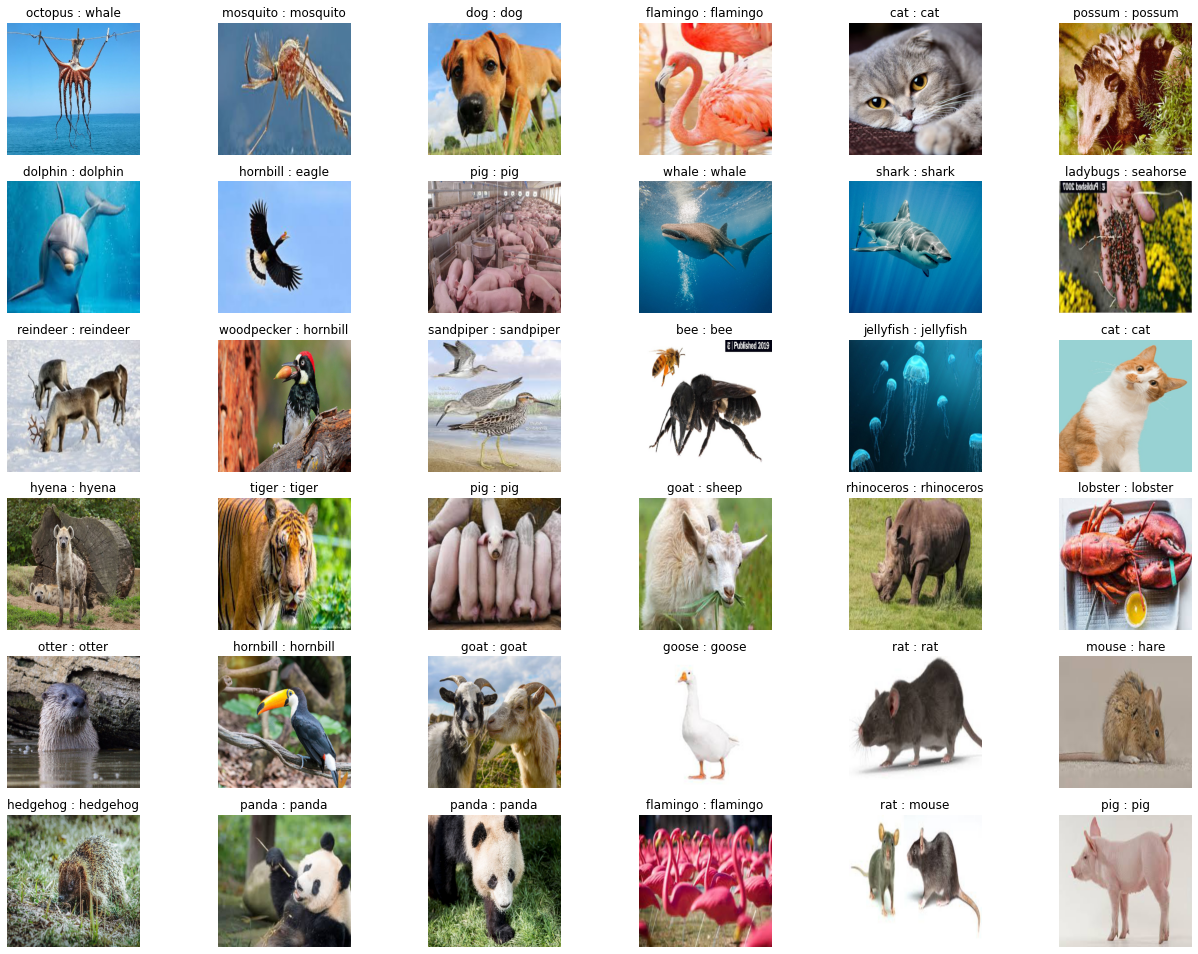

In [36]:
linhas = 6 #altura
colunas = 6 #largura

fig, axs = plt.subplots(linhas, colunas, figsize=(colunas * 2 + 10, linhas * 2 + 5)) #colunas = x, linhas = y

itr = 0
for lin in range(linhas):
    for col in range(colunas):
        lab_real = mapIndexToLabel(label[itr])
        lab_pred = mapIndexToLabel(pred[itr])
        
        image = desnormalize(img[itr].cpu().permute(1, 2, 0)).numpy()
        
        ax = axs[lin, col]
        
        ax.imshow(image)
        ax.set_title(f"{lab_real} : {lab_pred}")
        ax.axis('off')
        
        itr += 1
        
print("real : previsto")
plt.show()